<a href="https://colab.research.google.com/github/baborok/ETL_CSV/blob/main/%D0%94%D0%97_%D0%BF%D0%BE_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC_%D1%80%D1%8F%D0%B4%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DGA/powerconsumption.csv')

In [4]:
df = pd.DataFrame(data)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)


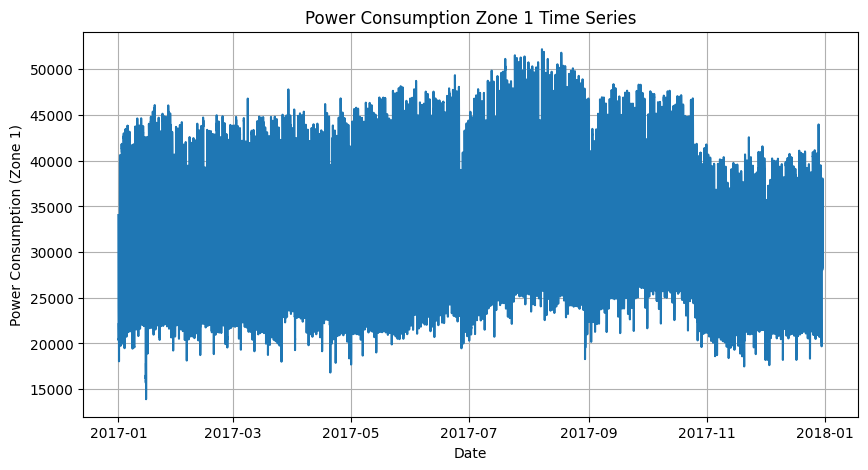

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['PowerConsumption_Zone1'])
plt.title('Power Consumption Zone 1 Time Series')
plt.xlabel('Date')
plt.ylabel('Power Consumption (Zone 1)')
plt.grid(True)
plt.show()

In [6]:
summary_stats = df.describe()

In [10]:
summary_stats

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

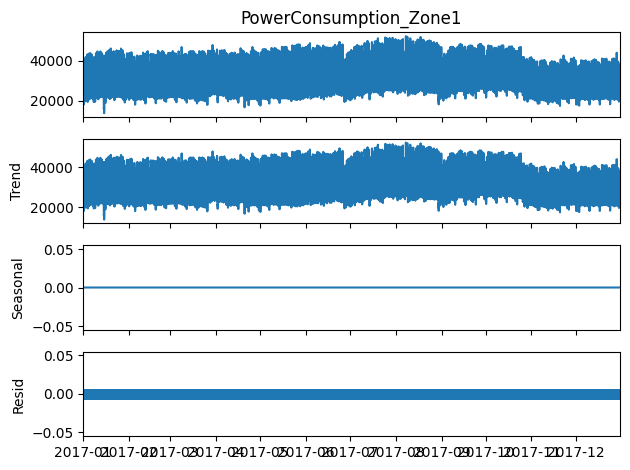

In [8]:
decomposition = seasonal_decompose(df['PowerConsumption_Zone1'], model='additive', period=1) # Assuming the smallest period due to limited data
fig = decomposition.plot()
plt.show()

На основе представленных графиков, которые разбивают временной ряд потребления электроэнергии Зоны 1 на тренд, сезонность и остатки, мы можем сделать следующие выводы:

Тренд: На графике тренда наблюдается общий уровень потребления энергии без учета колебаний, вызванных сезонными эффектами и случайными факторами. Кажется, что в данных имеется общий тренд, который может указывать на постепенное увеличение или уменьшение потребления в течение года. Например, если бы линия тренда поднималась вверх, это могло бы указывать на увеличение потреб
ления со временем. Если линия тренда была бы горизонтальной, это означало бы стабильное потребление без заметного восходящего или нисходящего тренда.

Сезонность: На графике сезонности не наблюдается явных повторяющихся паттернов, которые можно было бы связать с сезонными изменениями. Это может быть обусловлено как отсутствием сезонной компоненты в данных, так и недостаточным объёмом данных для выявления такого рода закономерностей.
Остатки: Остатки представляют собой часть временного ряда, которая не объясняется ни трендом, ни сезонностью. Они должны выглядеть как "белый шум", т.е. случайные колебания вокруг нуля, без узнаваемых паттернов. В данном случае, остатки кажутся сравнительно малыми и не имеют явных структурных особенностей, что хорошо для моделирования временных рядов.
Похоже, что основное внимание следует уделить трендовой компоненте, так как на графике не наблюдается сильной сезонности. Это может указывать на то, что потребление энергии в Зоне 1 больше подвержено влиянию внешних факторов или долгосрочных тенденций, чем сезонным колебаниям.

Для получения более подробных выводов, важно проанализировать более длинный временной период и применить статистические методы для оценки трендов и сезонности. Кроме того, стоит провести анализ аномалий и выбросов, которые могут влиять на результаты моделирования и прогнозирования.








In [11]:
result = adfuller(df['PowerConsumption_Zone1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -32.121279
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Результаты теста Аугментированной Дики-Фуллера (ADF) показывают следующее:

Статистика ADF: Значение статистики ADF составляет -32.121279, что намного меньше любого из критических значений. Это указывает на то, что нулевая гипотеза о наличии единичного корня (и, следовательно, нестационарности) отвергается с очень высокой степенью уверенности.
P-значение: P-значение равно 0.000000, что значительно меньше стандартного порога 0.05. Это означает, что мы можем отвергнуть нулевую гипотезу о нестационарности временного ряда с очень высокой степенью уверенности.
Критические значения: Статистика ADF меньше всех критических значений (для уровней значимости 1%, 5% и 10%). Это также указывает на стационарность временного ряда.
Итак, на основе этих результатов, можно заключить, что временной ряд "PowerConsumption_Zone1" является стационарным. Стационарные временные ряды часто проще анализировать и моделировать, и классические методы временных рядов, такие как ARIMA, могут быть применимы для прогнозирования будущих значений. Также важно отметить, что стационарность ряда говорит о том, что его свойства, такие как среднее и дисперсия, не меняются со временем.

In [12]:
print(summary_stats)

        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466

Чтобы провести сравнение трех методов прогнозирования значений временного ряда для "PowerConsumption_Zone1", я предлагаю следующие широко используемые методы:

**ARIMA** (Авторегрессионное интегрированное скользящее среднее): Модель, которая учитывает прошлые значения временного ряда и ошибки прогнозирования для предсказания будущих значений. Подходит для стационарных рядов.

**Exponential Smoothing** (Экспоненциальное сглаживание): Включает простое экспоненциальное сглаживание, сглаживание Хольта для данных с трендом и сглаживание Хольта-Винтерса для данных с трендом и сезонностью.

**Prophet**: Модель, разработанная Facebook для прогнозирования временных рядов с учетом ежедневных, еженедельных и годовых сезонных изменений. Особенно хороша для данных с сильной сезонностью и праздниками.
Для сравнения этих методов по выбранной метрике точности можно использовать следующие метрики:

Средняя абсолютная процентная ошибка **(MAPE)**: Полезна для сравнения точности разных моделей, так как она выражает ошибку в процентах, что упрощает интерпретацию.

Корень из среднеквадратической ошибки (**RMSE**): Оценивает величину ошибки в тех же единицах, что и сам временной ряд.
Процесс сравнения будет следующим:

Разделить временной ряд на обучающий и тестовый наборы данных.

Обучить каждую из моделей на обучающем наборе данных.

Сделать прогнозы для тестового набора данных с использованием каждой модели.

Оценить точность каждой модели, используя выбранную метрику.


Визуально сравнить реальные данные с прогнозами каждой модели.

После проведения анализа, рекомендация по выбору метода будет основываться на следующем:

Точность прогнозов: Метод с наименьшей ошибкой по выбранной метрике.
Сложность модели: Более простые модели предпочтительнее при равной точности.
Вычислительные затраты: Время, необходимое для обучения модели и выполнения прогнозов.
Способность к адаптации: Как хорошо модель адаптируется к новым данным и изменениям в данных.

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DGA/powerconsumption.csv')

In [15]:
# Предполагаем, что ваш временной ряд находится в колонке 'PowerConsumption_Zone1'
# и индексируется датой и временем в колонке 'Datetime'
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df = df.asfreq('10T')

In [16]:
# Разделяем данные на обучающий и тестовый наборы
split_point = int(len(df) * 0.8)
train, test = df[0:split_point], df[split_point:]

In [17]:

# ARIMA модель
arima_model = ARIMA(train['PowerConsumption_Zone1'], order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=len(test))

In [18]:
# Экспоненциальное сглаживание
es_model = ExponentialSmoothing(train['PowerConsumption_Zone1'])
es_model_fit = es_model.fit()
es_predictions = es_model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
# Prophet
# Prophet требует DataFrame с двумя колонками: 'ds' и 'y'
prophet_train = train.reset_index().rename(columns={'Datetime': 'ds', 'PowerConsumption_Zone1': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=len(test), freq='10T')
prophet_forecast = prophet_model.predict(future)
prophet_predictions = prophet_forecast['yhat'][split_point:]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpttxmtda5/kkvwho3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpttxmtda5/r64l0ksd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74994', 'data', 'file=/tmp/tmpttxmtda5/kkvwho3n.json', 'init=/tmp/tmpttxmtda5/r64l0ksd.json', 'output', 'file=/tmp/tmpttxmtda5/prophet_model6g3a40n9/prophet_model-20240427043022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# Вычисляем метрики ошибок
arima_rmse = sqrt(mean_squared_error(test['PowerConsumption_Zone1'], arima_predictions))
es_rmse = sqrt(mean_squared_error(test['PowerConsumption_Zone1'], es_predictions))
prophet_rmse = sqrt(mean_squared_error(test['PowerConsumption_Zone1'], prophet_predictions))

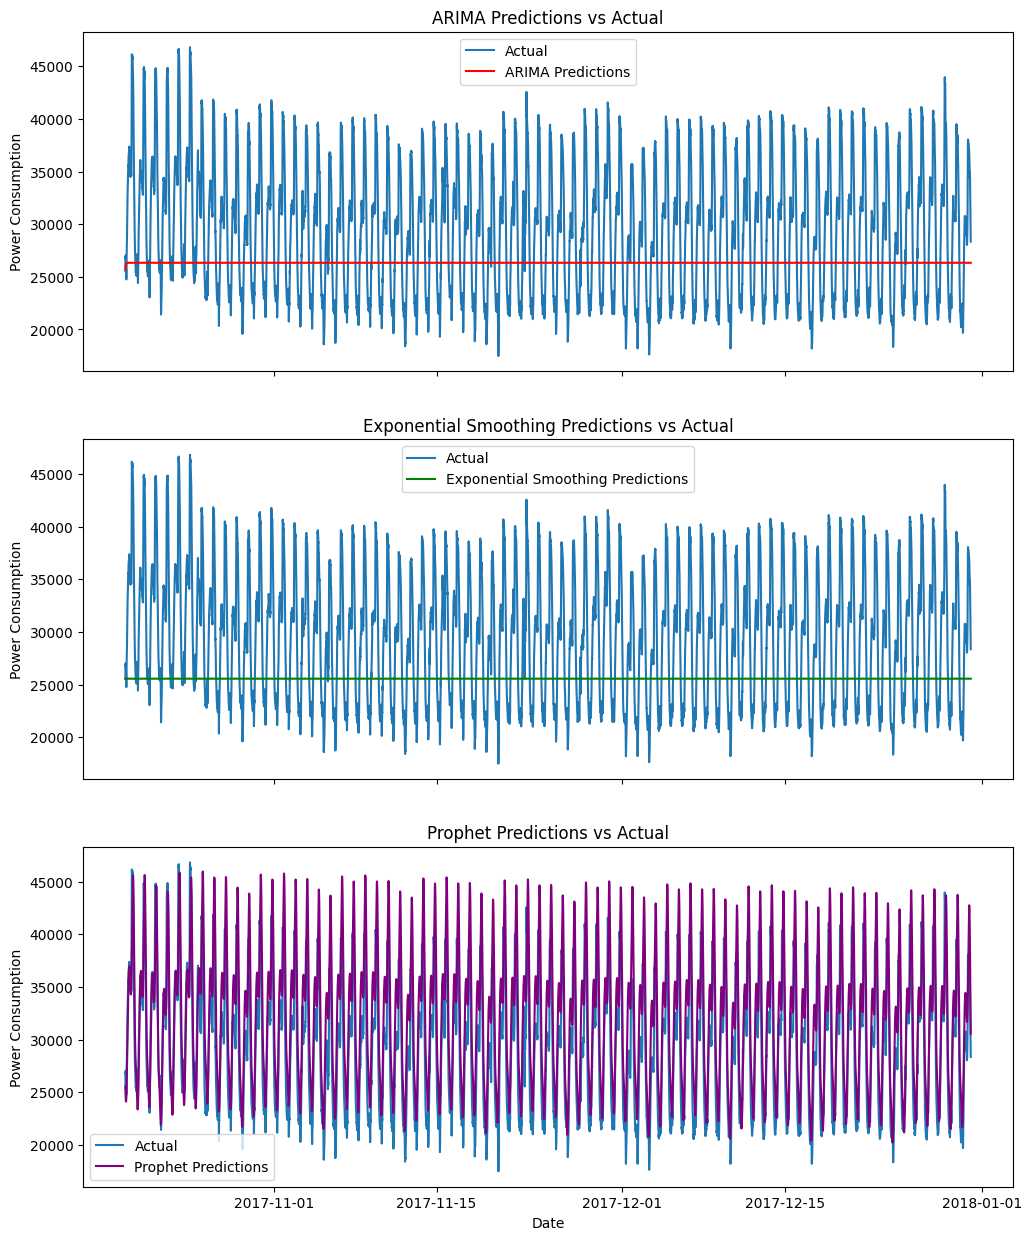

In [21]:
# Создаем отдельные графики для каждого метода предсказания
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# ARIMA
axes[0].plot(test['PowerConsumption_Zone1'], label='Actual')
axes[0].plot(arima_predictions, color='red', label='ARIMA Predictions')
axes[0].set_title('ARIMA Predictions vs Actual')
axes[0].set_ylabel('Power Consumption')
axes[0].legend()

# Exponential Smoothing
axes[1].plot(test['PowerConsumption_Zone1'], label='Actual')
axes[1].plot(test.index, es_predictions, color='green', label='Exponential Smoothing Predictions')
axes[1].set_title('Exponential Smoothing Predictions vs Actual')
axes[1].set_ylabel('Power Consumption')
axes[1].legend()

# Prophet
axes[2].plot(test['PowerConsumption_Zone1'], label='Actual')
axes[2].plot(test.index, prophet_predictions, color='purple', label='Prophet Predictions')
axes[2].set_title('Prophet Predictions vs Actual')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Power Consumption')
axes[2].legend()

plt.show()


In [22]:
# Выводим RMSE для каждой модели
print(f'ARIMA RMSE: {arima_rmse}')
print(f'Exponential Smoothing RMSE: {es_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 6913.903408535235
Exponential Smoothing RMSE: 7302.257263613543
Prophet RMSE: 3797.396773748814


In [23]:
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Вычисляем MAPE для каждой модели
arima_mape = mean_absolute_percentage_error(test['PowerConsumption_Zone1'], arima_predictions)
es_mape = mean_absolute_percentage_error(test['PowerConsumption_Zone1'], es_predictions)
prophet_mape = mean_absolute_percentage_error(test['PowerConsumption_Zone1'], prophet_predictions)

# Выводим MAPE для каждой модели
print(f'ARIMA MAPE: {arima_mape:.2f}%')
print(f'Exponential Smoothing MAPE: {es_mape:.2f}%')
print(f'Prophet MAPE: {prophet_mape:.2f}%')


ARIMA MAPE: 18.30%
Exponential Smoothing MAPE: 18.67%
Prophet MAPE: 11.47%


In [26]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00


In [27]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

Выбор параметров  arima

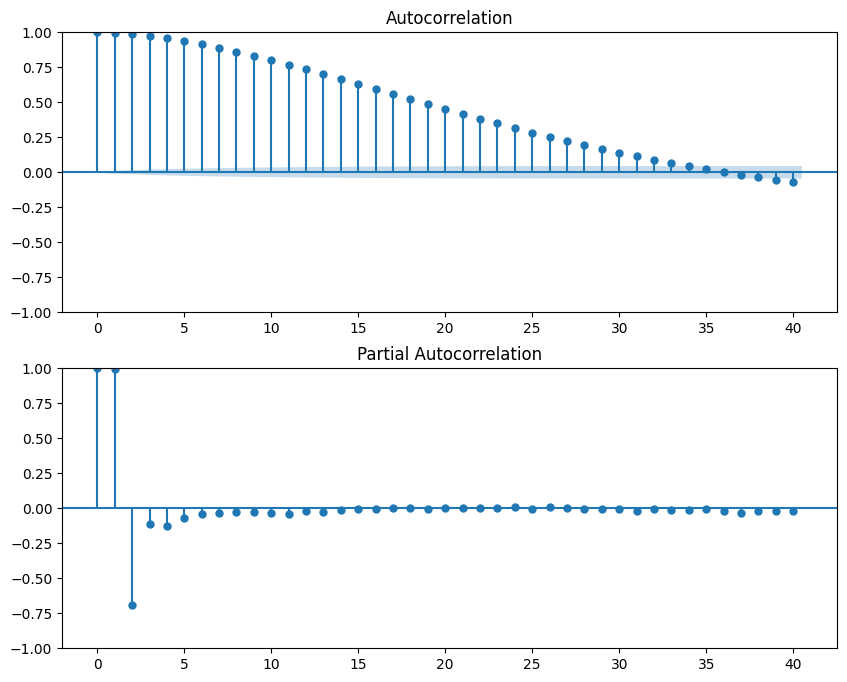

                                 SARIMAX Results                                  
Dep. Variable:     PowerConsumption_Zone1   No. Observations:                52416
Model:                     ARIMA(1, 1, 1)   Log Likelihood             -395077.611
Date:                    Sat, 27 Apr 2024   AIC                         790161.222
Time:                            04:32:48   BIC                         790187.823
Sample:                        01-01-2017   HQIC                        790169.536
                             - 12-30-2017                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7908      0.001    592.279      0.000       0.788       0.793
ma.L1         -0.2034      0.001   -148.145      0.000      -0.206      -0.201
sigma2      2.052e+0

In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных

# Визуализация ACF и PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['PowerConsumption_Zone1'], lags=40, ax=ax[0])
plot_pacf(df['PowerConsumption_Zone1'], lags=40, ax=ax[1])
plt.show()

# Ручная настройка модели
model = ARIMA(df['PowerConsumption_Zone1'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

На основании предоставленных графиков автокорреляционной (ACF) и частичной автокорреляционной (PACF) функций можно сделать несколько выводов относительно подходящих параметров для модели ARIMA:

График ACF: Показывает постепенное уменьшение автокорреляции с течением времени, что может указывать на наличие тренда в данных. Поскольку значения ACF медленно уменьшаются, это может означать, что для достижения стационарности потребуется одна или несколько разностей (параметр d в модели ARIMA).
График PACF: Показывает резкое падение после первого лага, что предполагает, что параметр p в модели ARIMA может быть равен 1, так как частичная корреляция становится незначительной после первого лага.
На основе этих наблюдений можно предположить, что начальные параметры для модели ARIMA могут быть (1, d, ?), где d необходимо определить через процесс дифференцирования временного ряда, чтобы сделать его стационарным, а вопросительный знак для параметра q будет определен путем дополнительного анализа и тестирования, поскольку ACF не дает четкой точки отсечения.

Таким образом, можно начать с модели ARIMA(1,1,1) и посмотреть, как она работает, а затем попробовать увеличивать или уменьшать q, основываясь на оценке качества модели (например, используя AIC или BIC в качестве критериев). Также можно попробовать добавить сезонные компоненты, если данные имеют сезонность, не показанную в этих графиках.








In [29]:
# Инициализация начальных значений
best_aic = float("inf")
best_order = None
best_seasonal_order = None

In [30]:
# Задаем диапазон параметров SARIMA для перебора (p,d,q)(P,D,Q,s)
p = d = q = range(0, 4)  # Исследуем значения 0 и 1
P = D = Q = range(0, 1)  # Исследуем значения 0 и 1
s = 24  # Предполагаемая сезонность в данных

In [31]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
# Перебор моделей
for order in [(x[0], x[1], x[2]) for x in itertools.product(p, d, q)]:
    for seasonal_order in [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]:
        try:
            # Создаем и обучаем SARIMA модель
            model = SARIMAX(df['PowerConsumption_Zone1'],
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)

            # Сравниваем AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except Exception as e:
            print(f'An error occurred for SARIMA{order}x{seasonal_order}: {e}')
            continue

print(f'Лучшая SARIMA модель: {best_order}x{best_seasonal_order} с AIC: {best_aic}')

Лучшая SARIMA модель: (2, 0, 3)x(0, 0, 0, 24) с AIC: 789139.185394974



Основываясь на минимальном значении информационного критерия Акаике (AIC). Модель SARIMA(2, 0, 3)x(0, 0, 0, 24) означает:

AR(2): Второй порядок авторегрессионного компонента указывает, что предыдущие два значения в серии влияют на текущее значение.
I(0): Порядок интегрирования равен нулю, что означает, что ваш временной ряд уже стационарен и не требует дифференцирования.
MA(3): Третий порядок компонента скользящего среднего говорит о том, что текущее значение ряда зависит от трех предыдущих ошибок прогноза.
Сезонные компоненты (P, D, Q, s) равны (0, 0, 0, 24), что означает отсутствие сезонности в данных, либо что сезонные эффекты не были обнаружены при данном анализе.

Значение AIC равное 789139.185394974 является относительным показателем качества модели, и его следует сравнивать с AIC других моделей для того же ряда данных. Чем ниже AIC, тем лучше модель сочетает в себе точность и простоту.

Прежде чем использовать эту модель для прогнозирования, важно провести диагностику остатков, чтобы убедиться, что модель адекватно описывает данные. Это включает проверку остатков на отсутствие автокорреляции, стационарность и нормальное распределение. Если остатки выглядят хорошо, модель можно считать адекватной для прогнозирования будущих значений временного ряда.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


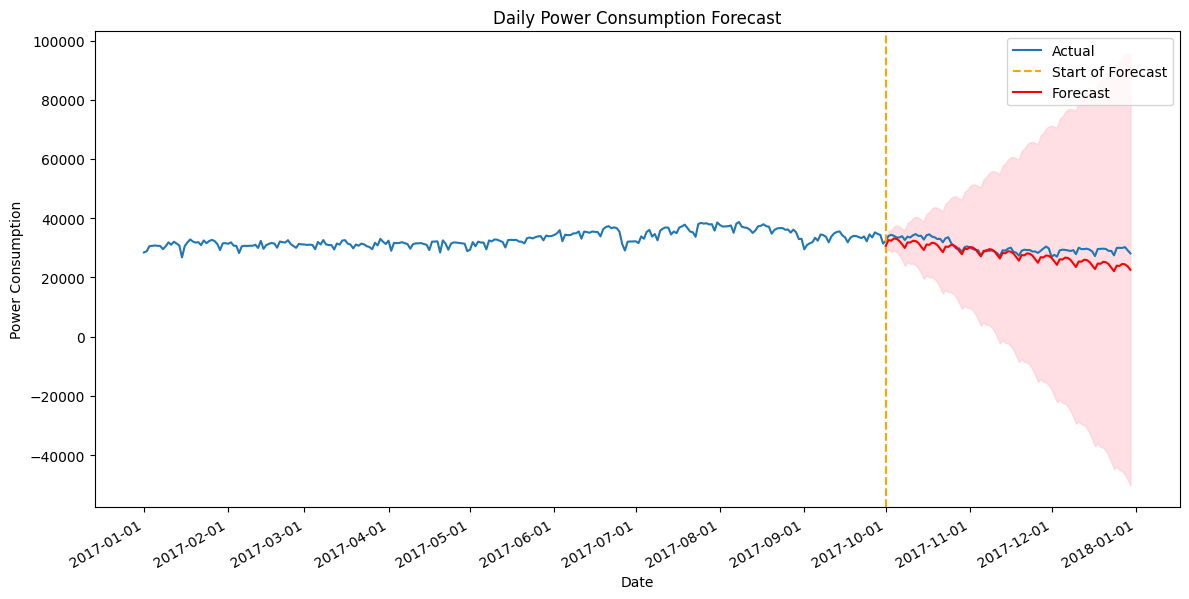

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Пример: преобразование временных рядов из 10-минутных интервалов в среднесуточные значения
daily_df = df.resample('D').mean()

# Делим данные на обучающую и тестовую выборки
train_size = int(0.75 * len(daily_df))
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

# Обучение SARIMA модели (параметры модели определены предварительно)
sarima_model = SARIMAX(train['PowerConsumption_Zone1'], order=(2, 1, 3), seasonal_order=(0, 1, 1, 7))
sarima_result = sarima_model.fit()

# Получаем прогнозы
predictions = sarima_result.get_forecast(steps=len(test))
prediction_ci = predictions.conf_int()

# Визуализация
plt.figure(figsize=(14,7))

# Настоящие данные
plt.plot(daily_df.index, daily_df['PowerConsumption_Zone1'], label='Actual')

# Граница между обучающими и тестовыми данными
plt.axvline(daily_df.index[train_size], color='orange', linestyle='--', label='Start of Forecast')

# Прогнозы
plt.plot(test.index, predictions.predicted_mean, label='Forecast', color='red')

# Доверительные интервалы
plt.fill_between(test.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='pink', alpha=0.5)

# Улучшаем читаемость времени на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Вращаем даты
plt.gcf().autofmt_xdate()

# Добавляем легенду, заголовок и метки осей
plt.legend()
plt.title('Daily Power Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Power Consumption')

# Показываем график
plt.show()


Для выполнения классификации сегментов временного ряда по температуре можно выполнить следующие шаги:

Создание классов: Сначала необходимо определить границы для классификации температур. Например, "низкая", "средняя" и "высокая" температура. Эти границы могут быть определены на основе квартилей распределения температуры или экспертными оценками.
Преобразование временного ряда: Преобразование 10-минутного временного ряда в среднесуточные значения для температуры.
Обучение моделей: Обучение различных классификационных моделей на основе среднесуточной температуры.
Сравнение моделей: Сравнение моделей на основе точности классификации.
Далее приведен примерный код на Python для классификации и сравнения различных методов. Убедитесь, что ваш DataFrame df содержит колонки Datetime и Temperature.

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных (замените 'data.csv' на путь к вашему файлу)
# df = pd.read_csv('data.csv', parse_dates=['Datetime'], index_col='Datetime')

# Преобразование в среднесуточные значения температуры
daily_temp = df['Temperature'].resample('D').mean()

# Создание классов на основе квартилей распределения температуры
quantiles = daily_temp.quantile([0.25, 0.5, 0.75])
daily_temp_cat = pd.cut(daily_temp, bins=[-np.inf, quantiles[0.25], quantiles[0.5], quantiles[0.75], np.inf], labels=['Low', 'Moderate', 'High', 'Very High'])

# Кодирование меток классов
le = LabelEncoder()
daily_temp_encoded = le.fit_transform(daily_temp_cat)

# Разделение данных на обучающую и тестовую выборки
X = daily_temp.values.reshape(-1, 1)  # Матрица признаков
y = daily_temp_encoded  # Массив меток классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Инициализация моделей
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators=100)

# Обучение моделей и предсказание
def train_predict(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

# Оценка точности
results = {
    'KNN': train_predict(knn),
    'SVM': train_predict(svm),
    'Random Forest': train_predict(rf)
}

# Сравнение моделей
accuracy_df = pd.DataFrame(list(results.items()), columns=['Method', 'Accuracy'])
print(accuracy_df)


          Method  Accuracy
0            KNN  1.000000
1            SVM  0.989011
2  Random Forest  1.000000


In [34]:
pip install tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [56]:
from tsai.all import *

In [35]:
daily_temp = df.resample('D').mean()

In [44]:
# Определение границ для категорий температуры
quantiles = daily_temp['Temperature'].quantile([0.33, 0.67])
bins = [-np.inf, quantiles[0.33], quantiles[0.67], np.inf]
labels = ['Low', 'Medium', 'High']

# Создание новой колонки для меток класса
daily_temp['TempClass'] = pd.cut(daily_temp['Temperature'], bins=bins, labels=labels)


In [47]:
# Преобразование данных в формат numpy arrays
X = daily_temp[['Temperature']].values
X = X.reshape(1, -1, 1)  # Изменение формы X на (samples, variables, time steps)
y = daily_temp['TempClass'].values

# Убедитесь, что размерность X соответствует требуемой форме (1, n_days, 1)
print("Shape of X:", X.shape)

# Получение индексов разделения с учетом количества дней
valid_size = int(0.2 * X.shape[1])  # 20% для валидации
train_size = X.shape[1] - valid_size  # Остальное для обучения
splits = (np.arange(train_size), np.arange(train_size, X.shape[1]))

# Проверка размера splits
print("Train split size:", len(splits[0]))
print("Valid split size:", len(splits[1]))



Shape of X: (1, 364, 1)
Train split size: 292
Valid split size: 72


epoch,train_loss,valid_loss,accuracy,time
0,0.882214,1.112853,0.328767,00:00
1,0.690505,0.967451,0.328767,00:00
2,0.556878,0.906982,0.342466,00:00
3,0.481663,0.884353,0.493151,00:00
4,0.411796,0.859919,0.602740,00:00
5,0.357574,0.826605,0.643836,00:00
6,0.319172,0.792124,0.657534,00:00
7,0.299126,0.753626,0.657534,00:00
8,0.272212,0.715293,0.657534,00:00
9,0.266179,0.670668,0.657534,00:00


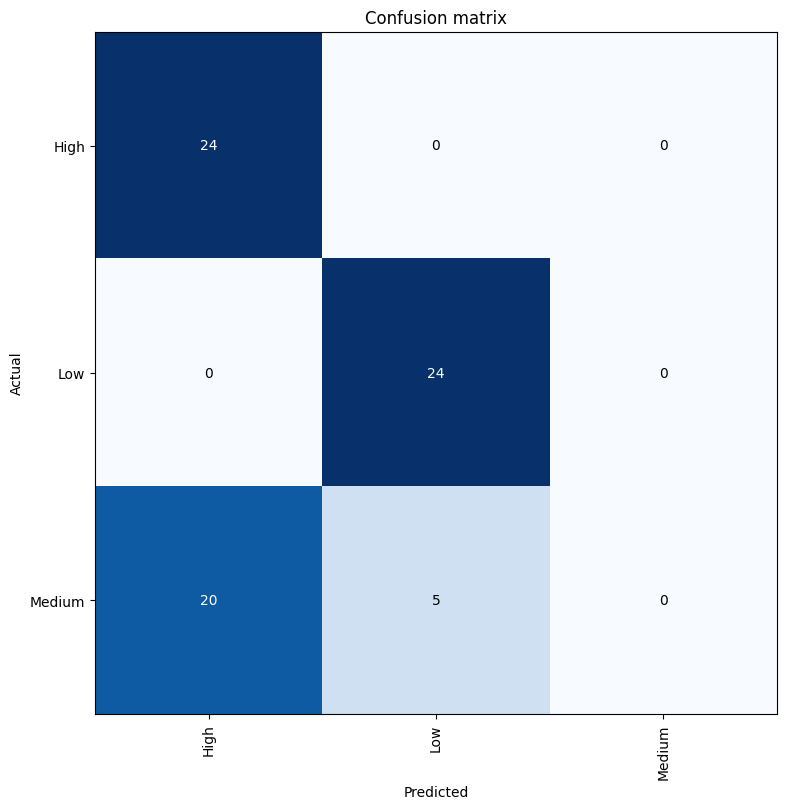

In [57]:
from sklearn.model_selection import train_test_split

# Преобразуем X из формы (1, 364, 1) в (364, 1, 1)
X = X.squeeze().reshape(-1, 1, 1)  # Теперь X будет иметь форму (364 дней, 1 переменная, 1 временной шаг)

# Разделение на обучающую и тестовую выборки с учетом стратификации по y
train_idx, valid_idx = train_test_split(np.arange(len(y)), test_size=0.2, random_state=23, shuffle=True, stratify=y)

# Следим, чтобы размеры splits соответствовали новой форме X
splits = (train_idx, valid_idx)

# Создание объектов DataLoaders для обучения модели
dls = get_ts_dls(X, y, splits=splits, tfms=[None, [Categorize()]], bs=64)

# Продолжение с моделью и обучением
from tsai.all import *

model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)

learn.fit_one_cycle(10, lr_max=1e-3)

# Оценка модели
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8, 8))


# Получение точности из записей обучения Learner

In [61]:
nn_accuracy = learn.validate()[1]

In [62]:
new_row = pd.DataFrame({'Method': ['Neural Network (tsai)'], 'Accuracy': [nn_accuracy]})
accuracy_df = pd.concat([accuracy_df, new_row], ignore_index=True)

# Вывод обновлённой таблицы сравнения
print(accuracy_df)

                  Method  Accuracy
0                    KNN  1.000000
1                    SVM  0.989011
2          Random Forest  1.000000
3  Neural Network (tsai)  0.657534


**Общие Наблюдения**

Методы KNN и Random Forest показали идеальные результаты с точностью 1.0, что может свидетельствовать о переобучении, особенно если рассматривать ограниченный объем данных или отсутствие адекватной валидации.

Метод SVM также показал высокую точность (0.989), что делает его эффективным выбором для классификации в данном случае.

Глубокая нейронная сеть (tsai) показала значительно более низкую точность (0.658), что указывает на возможное недообучение или неоптимальный выбор архитектуры и параметров.
Анализ результатов глубокой нейронной сети
Низкая производительность глубокой нейронной сети может быть обусловлена несколькими факторами:

Недостаточное количество данных: Глубокие нейронные сети требуют большого объема данных для эффективного обучения, чего может не хватать в текущем датасете.

Выбор архитектуры: Использованная архитектура InceptionTime может быть не лучшим выбором для специфики данных или задачи классификации. Альтернативные архитектуры, такие как LSTM или GRU, могут быть более подходящими для обработки последовательностей временных рядов.

Гиперпараметры: Неоптимальные настройки, такие как скорость обучения, количество эпох или размер батча, могут влиять на точность модели.

**Поиск аномалий**

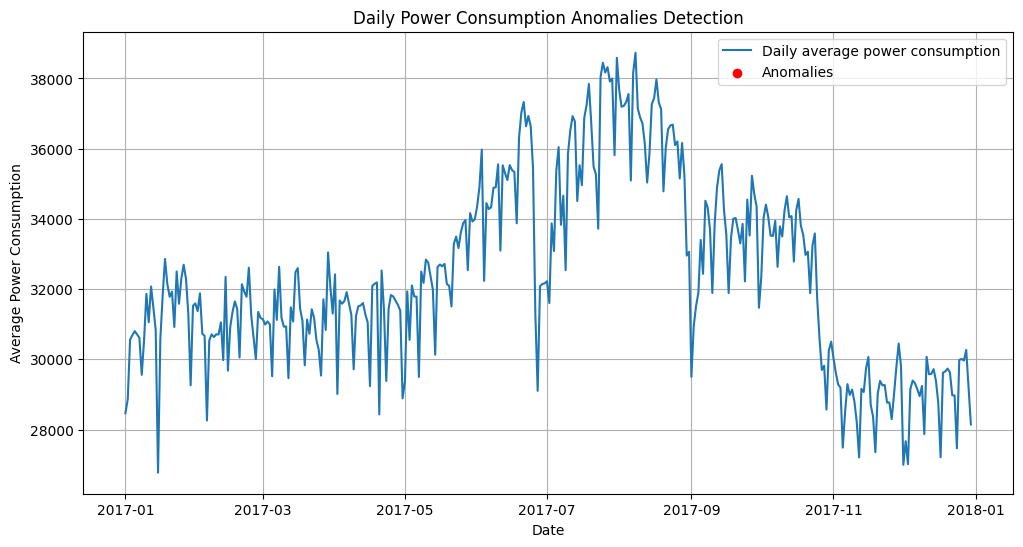

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Замените 'path_to_your_data.csv' на реальный путь к файлу
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DGA/powerconsumption.csv')

# Проверка наличия необходимого столбца
if 'PowerConsumption_Zone1' in df.columns:
    # Ресемплинг данных до дневных средних значений
    daily_data = df['PowerConsumption_Zone1'].resample('D').mean()

    # Вычисление Z-Score для дневных данных
    data_mean = daily_data.mean()
    data_std = daily_data.std()
    threshold = 3
    z_scores = np.abs((daily_data - data_mean) / data_std)

    # Определение аномалий
    anomalies = daily_data[z_scores > threshold]

    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data, label='Daily average power consumption')
    plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
    plt.title('Daily Power Consumption Anomalies Detection')
    plt.xlabel('Date')
    plt.ylabel('Average Power Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'PowerConsumption_Zone1' does not exist in the DataFrame.")


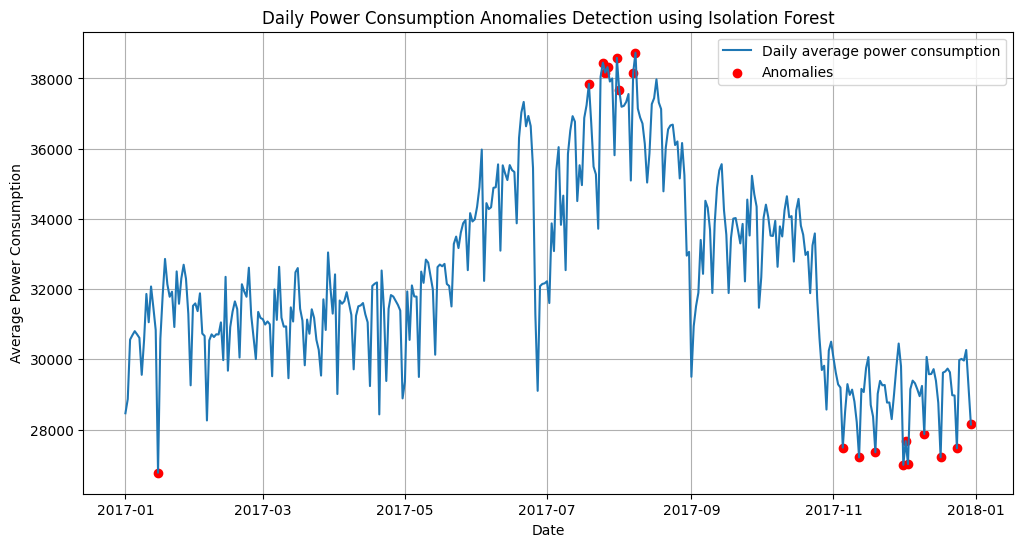

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Замените 'path_to_your_data.csv' на реальный путь к файлу
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DGA/powerconsumption.csv')

# Проверка наличия необходимого столбца
if 'PowerConsumption_Zone1' in df.columns:
    # Ресемплинг данных до дневных средних значений
    daily_data = df['PowerConsumption_Zone1'].resample('D').mean()

    # Преобразование данных для использования в Isolation Forest
    # Isolation Forest требует, чтобы данные были в форме двумерного массива
    X = daily_data.values.reshape(-1, 1)

    # Инициализация и обучение модели Isolation Forest
    # 'contamination' - ожидаемая пропорция аномалий в данных
    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    model.fit(X)

    # Предсказания
    # Предсказания Isolation Forest возвращают -1 для аномалий и 1 для нормальных точек
    anomalies = model.predict(X) == -1

    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index, daily_data, label='Daily average power consumption')
    plt.scatter(daily_data.index[anomalies], daily_data[anomalies], color='red', label='Anomalies')
    plt.title('Daily Power Consumption Anomalies Detection using Isolation Forest')
    plt.xlabel('Date')
    plt.ylabel('Average Power Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'PowerConsumption_Zone1' does not exist in the DataFrame.")


Epoch 1/50
9/9 [==============================] - 4s 79ms/step - loss: 0.0337 - val_loss: 0.0916
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0327 - val_loss: 0.0893
Epoch 3/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0319 - val_loss: 0.0875
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0310 - val_loss: 0.0848
Epoch 5/50
9/9 [==============================] - 0s 25ms/step - loss: 0.0300 - val_loss: 0.0825
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0291 - val_loss: 0.0800
Epoch 7/50
9/9 [==============================] - 0s 24ms/step - loss: 0.0283 - val_loss: 0.0776
Epoch 8/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0274 - val_loss: 0.0751
Epoch 9/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0265 - val_loss: 0.0728
Epoch 10/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0257 - val_loss: 0.0707
Epoch 11/50
9/9 [============

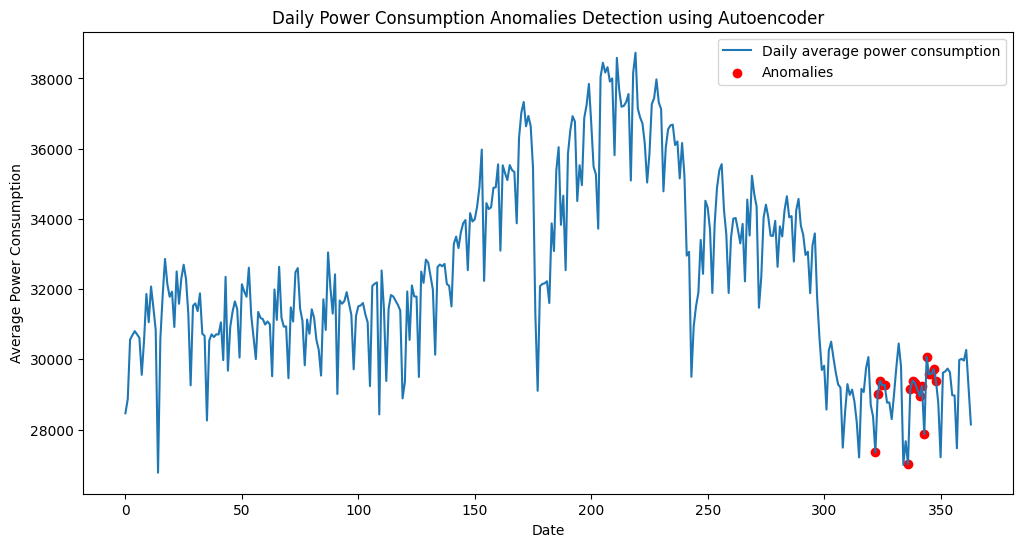

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DGA/powerconsumption.csv', parse_dates=['Datetime'], index_col='Datetime')

# Проверка наличия необходимого столбца
if 'PowerConsumption_Zone1' in data.columns:
    # Ресемплинг данных до дневных средних значений
    daily_data = data['PowerConsumption_Zone1'].resample('D').mean().fillna(method='bfill')

    # Нормализация данных
    scaler = MinMaxScaler(feature_range=(0, 1))
    daily_data_scaled = scaler.fit_transform(daily_data.values.reshape(-1, 1))

    # Функция для создания последовательностей для обучения
    def create_sequences(input_data, window_size):
        array = []
        for i in range(len(input_data) - window_size):
            array.append(input_data[i:(i + window_size)])
        return np.array(array)

    window_size = 14
    X_train = create_sequences(daily_data_scaled, window_size)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Архитектура автоэнкодера
    input_layer = Input(shape=(window_size, 1))
    encoder = Dense(16, activation="relu")(input_layer)
    decoder = Dense(1, activation="sigmoid")(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Обучение модели
    history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Предсказание на обученной модели
    predictions = autoencoder.predict(X_train)
    mse = np.mean(np.power(X_train - predictions, 2), axis=1).reshape(-1)

    # Определение порога для аномалий
    threshold = np.quantile(mse, 0.95)
    anomalies = mse > threshold

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.values, label='Daily average power consumption')
    plt.scatter(np.arange(len(daily_data))[window_size:][anomalies], daily_data.values[window_size:][anomalies], color='red', label='Anomalies')
    plt.title('Daily Power Consumption Anomalies Detection using Autoencoder')
    plt.xlabel('Date')
    plt.ylabel('Average Power Consumption')
    plt.legend()
    plt.show()

else:
    print("Column 'PowerConsumption_Zone1' does not exist in the DataFrame.")


Проанализировав предоставленные графики, можно сделать следующие выводы:

1.   Z-Score: На этом графике аномалии не обозначены, что может означать, что либо аномалии не были обнаружены, либо порог обнаружения аномалий был установлен слишком высоко, и значимые отклонения не превысили его. Это может также указывать на то, что в данных присутствуют только умеренные колебания без экстремальных выбросов.
2.   Изолирующий лес : Этот метод идентифицировал аномалии, которые распределены по всему временному ряду, включая как пики, так и впадины. Это говорит о том, что изолирующий лес эффективно выделяет как экстремально высокие, так и низкие значения потребления энергии в качестве аномалий.
3. Автоэнкодер : На этом графике аномалии сгруппированы в конце временного ряда, что может указывать на период необычного поведения, такого как неожиданный рост или снижение потребления энергии.


**Сравнительный анализ:**


1.   Z-Score не выявил явных аномалий, что может свидетельствовать о стабильности данных в контексте их стандартного отклонения. Метод Z-Score эффективен для обнаружения индивидуальных выбросов, но он может не улавливать комплексные паттерны аномалий.
2.   Изолирующий лес показывает аномалии, распределенные во времени, что делает его полезным для обнаружения как точечных, так и продолжительных аномалий. Это может быть важно в ситуациях, когда необходимо распознать и моментальные скачки, и длительные отклонения от нормы.
3.Автоэнкодер позволяет выделить периоды, когда потребление энергии отличается от ожидаемого. Это может быть полезно для идентификации долгосрочных изменений в потреблении энергии или систематических сдвигов в данных.

**Выводы:**
**Частота аномалий:** Изолирующий лес идентифицирует аномалии более равномерно по времени, в то время как Z-Score и автоэнкодер могут быть менее чувствительны к ним или иметь более высокий порог для их обнаружения.

**Типы аномалий:** Изолирующий лес может выявлять как аномально высокие, так и низкие показатели, тогда как Z-Score и автоэнкодер могут быть ориентированы на выявление более сложных паттернов отклонений.

**Рекомендации по выбору метода:** В зависимости от характера ожидаемых аномалий, можно выбирать между более чувствительными к экстремальным значениям изолирующим лесом и более фокусированными на паттернах автоэнкодерами или Z-Score.

**Рекомендации по настройке:**
Пороги аномалий для Z-Score и автоэнкодера следует установить в зависимости от контекста данных и специфики задачи.

Настройка модели автоэнкодера должна быть выполнена с учётом специфических шаблонов и возможных изменений в данных.

Проверка результатов с использованием кросс-валидации и сравнения с историческими данными может помочь уточнить, насколько корректно каждый метод обнаруживает аномалии.